In [42]:
initial_path = 'peptide-QML'
# initial_path = '..'

In [43]:
import numpy as np
import sys, time
sys.path.append(initial_path)

%load_ext autoreload
%autoreload 2
from my_code import helper_classes as c
from my_code import pytorch_model as ptm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
# name of the notebook


In [45]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0912',
    file_name='sweep_12c_h-1',
)

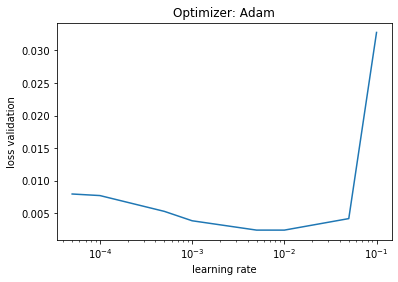

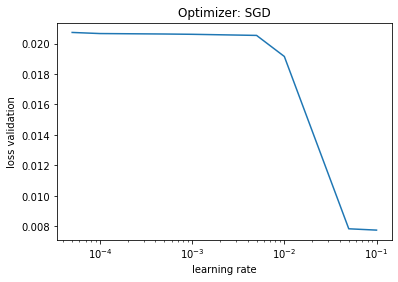

In [46]:
for opt in ['Adam', 'SGD']:
    list_lr = []
    list_loss_val = []
    for x in sweep.points_w_data:
        if 'loss_validation' in x and opt in str(x['optimizer']):
            list_lr.append(x['lr'])
            list_loss_val.append(x['loss_validation'])

    # print(tuple(zip(list_lr, list_loss_val)))

    # plot
    import matplotlib.pyplot as plt
    plt.plot(list_lr, list_loss_val)
    plt.xlabel('learning rate')
    plt.ylabel('loss validation')
    plt.xscale('log')
    plt.title('Optimizer: {}'.format(opt))
    plt.show()
